# B''H

## House Prices - EDA

**Step 5: Analyze the categorical text variables in consideration for feature selection.**

In this step keep in mind the following questions:
- Do we think about this variable when we are buying a house?
- If yes, how important would this variable be?
- Is this information already described in any other variable? 

**Key Takeaway:** 
-

In [1]:
import os
import sys

import math

import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

---
## Set the plot output sizes

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---
## Get project info

In [3]:
NOTEBOOKS_DIR = os.path.join(os.pardir)

print(os.path.abspath(NOTEBOOKS_DIR))

/home/laz/repos/springboard-mini-projects/notebooks


In [4]:
PROJ_ROOT = os.path.join(NOTEBOOKS_DIR,os.pardir)

print(os.path.abspath(PROJ_ROOT))

/home/laz/repos/springboard-mini-projects


In [5]:
# add the 'src' directory as one where we can import modules
SRC_DIR = os.path.join(PROJ_ROOT, 'src')
sys.path.append(SRC_DIR)

print(os.path.abspath(SRC_DIR))

/home/laz/repos/springboard-mini-projects/src


In [7]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Import the data:

In [15]:
df_train = hf.read_csv(
    p_dir       = hf.DATA_INTERIM_DIR,
    p_file_name = 'df_train_step_04.csv',
    p_index_col = 'Id'
)

df_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQualRecode,ExterCondRecode,HeatingQCRecode,KitchenQualRecode
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,4,3,5,4
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,3,3,5,3
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,4,3,5,4
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,3,3,4,4
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,4,3,5,4


---

In [19]:
fields = [
    ['MSSubClass',    'Type of dwelling'],
    ['MSZoning',      'Zoning classification'],
    ['Street',        'Road access'],
    ['LotShape',      'Shape of property'],
    ['LandContour',   'Flatness of the property'],
    ['Utilities',     'Utilities available'],
    ['LotConfig',     'Lot configuration'],
    ['LandSlope',     'Slope of property'],
    ['Neighborhood',  'Ocations within Ames city'],
    ['Condition1',    'Proximity to various conditions'],
    ['Condition2',    'Proximity to various conditions'],
    ['BldgType',      'Type of dwelling'],
    ['HouseStyle',    'Style of dwelling'],
    ['RoofStyle',     'Type of roof'],
    ['RoofMatl',      'Roof material'],
    ['Exterior1st',   'Exterior covering on house'],
    ['Exterior2nd',   'Exterior covering on house'],
    ['Foundation',    'Type of foundation'],
    ['Heating',       'Type of heating'],
    ['CentralAir',    'Central air conditioning'],
    ['Electrical',    'Electrical system'],
    ['Functional',    'Home functionality'],
    ['PavedDrive',    'Paved driveway'],
    ['SaleType',      'Type of sale'],
    ['SaleCondition', 'Condition of sale']
]

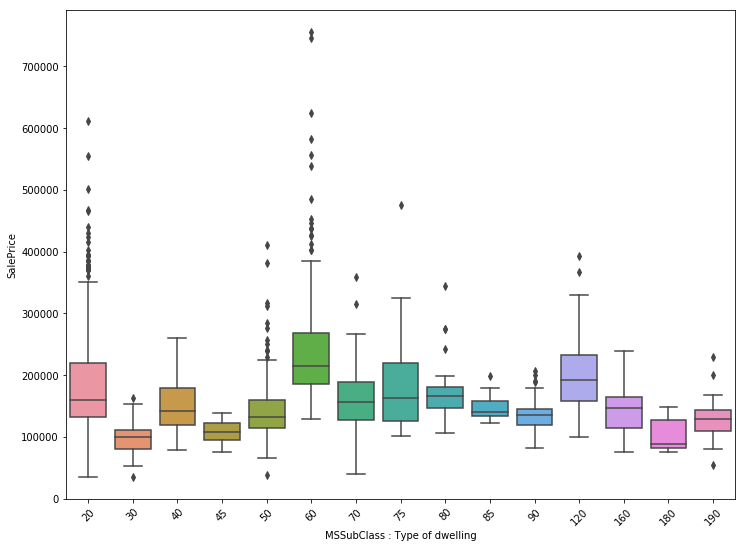

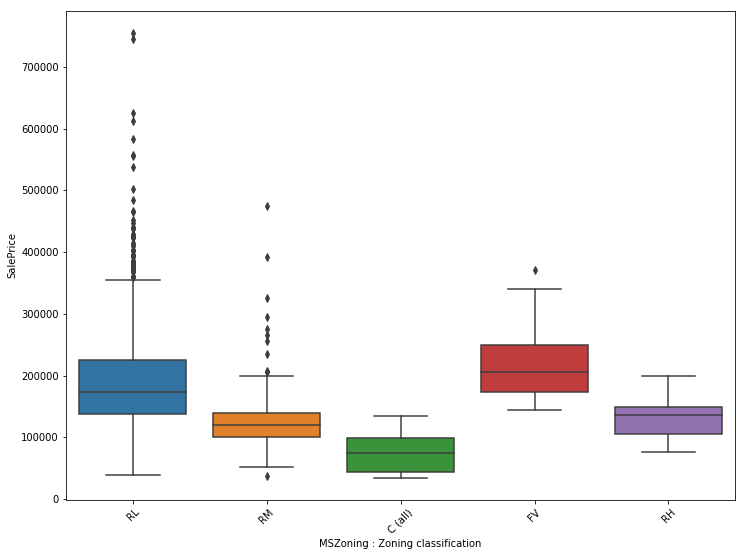

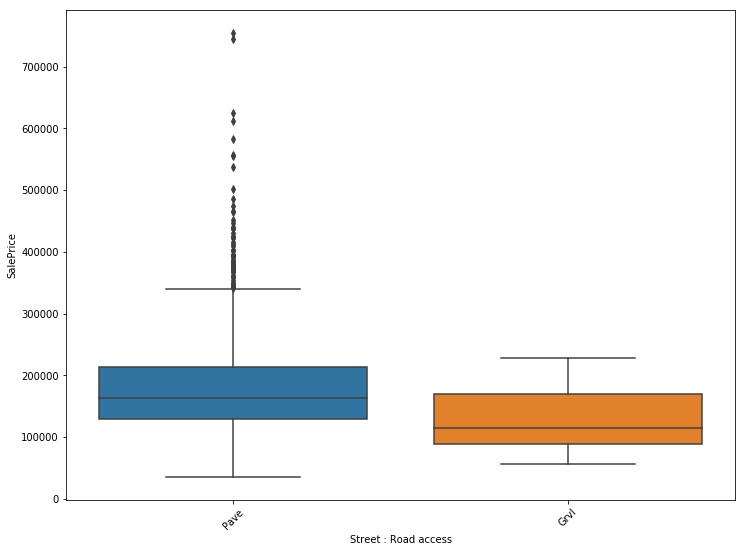

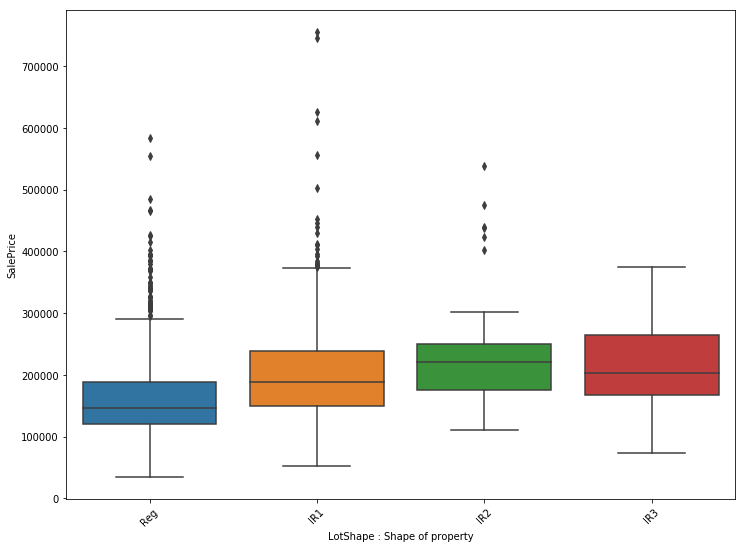

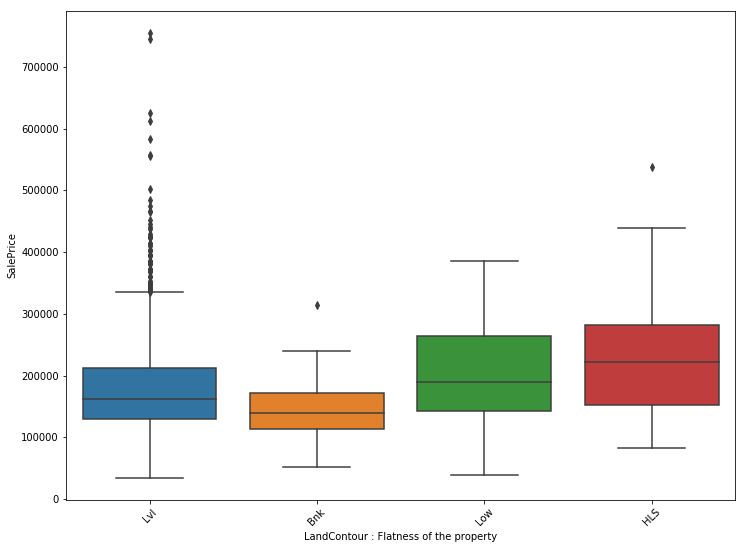

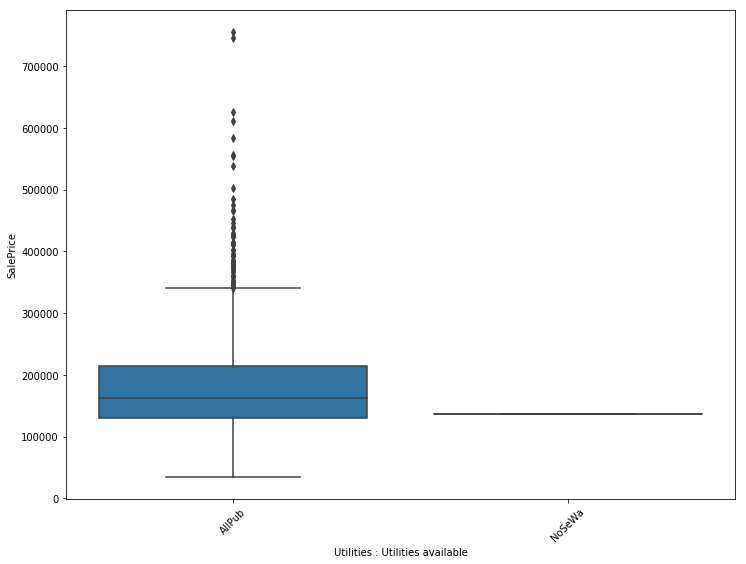

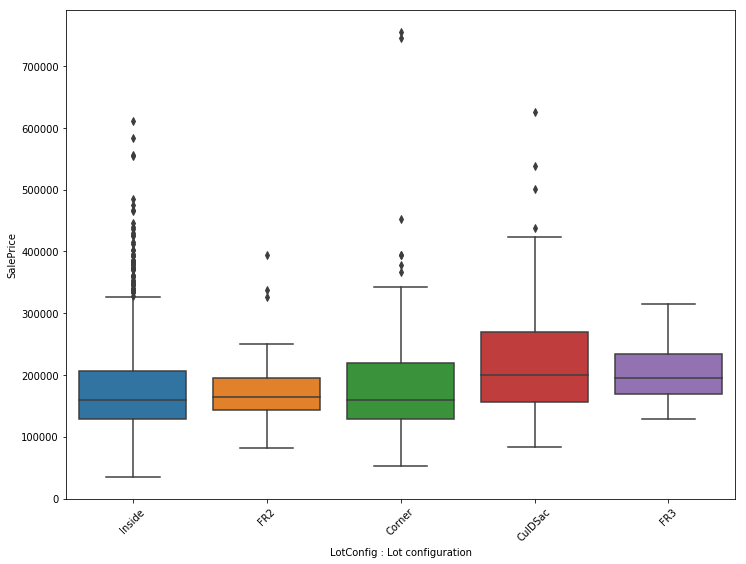

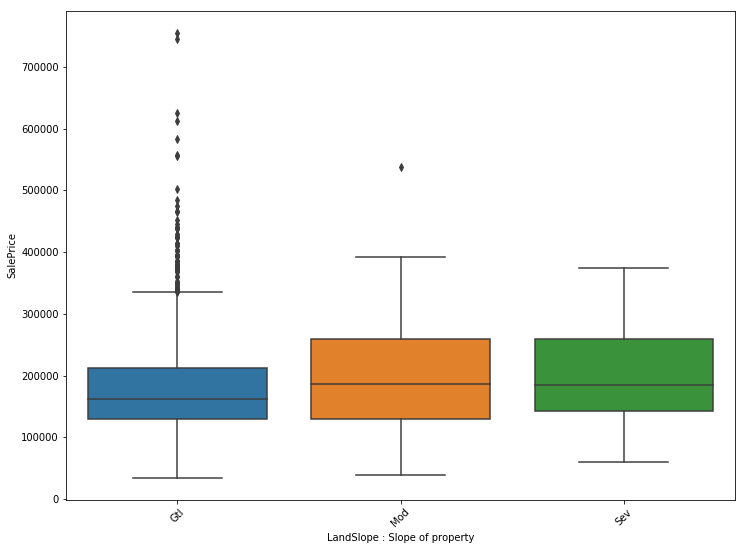

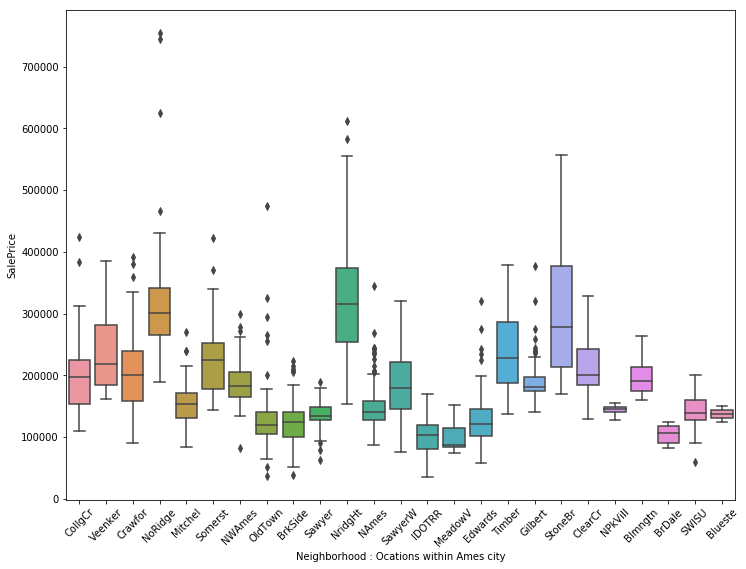

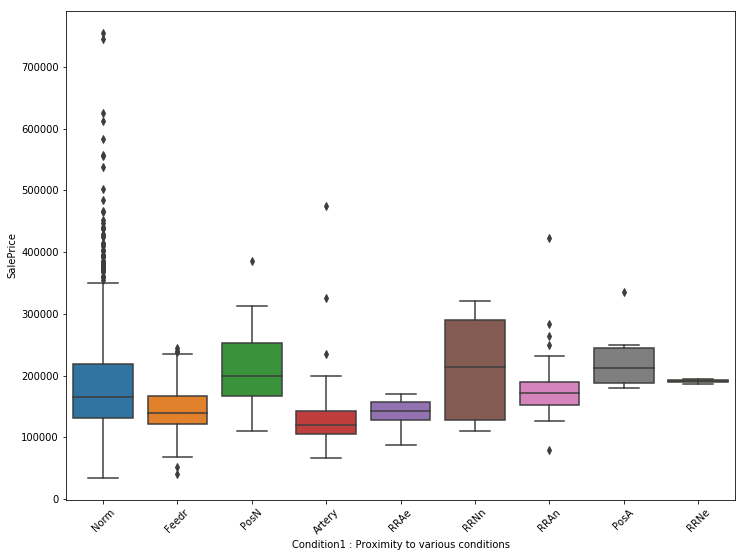

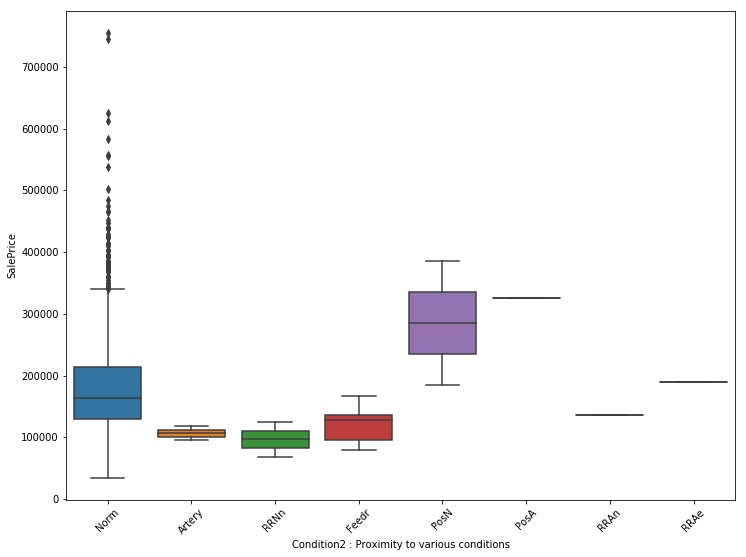

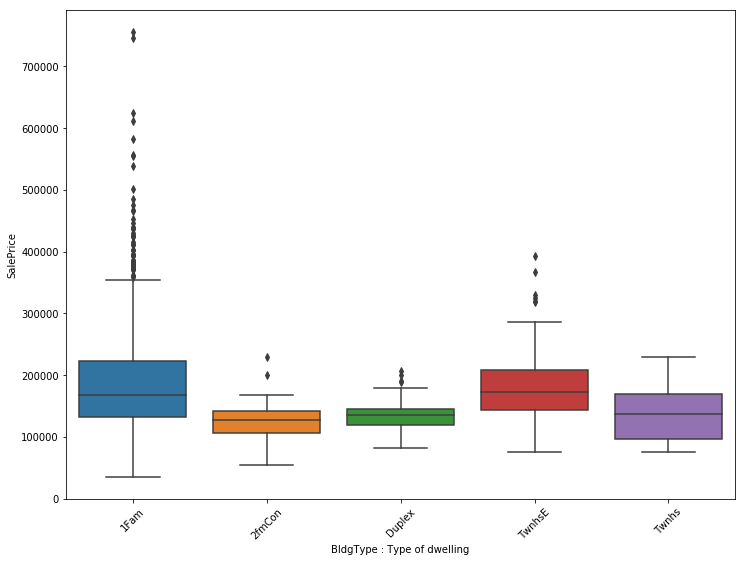

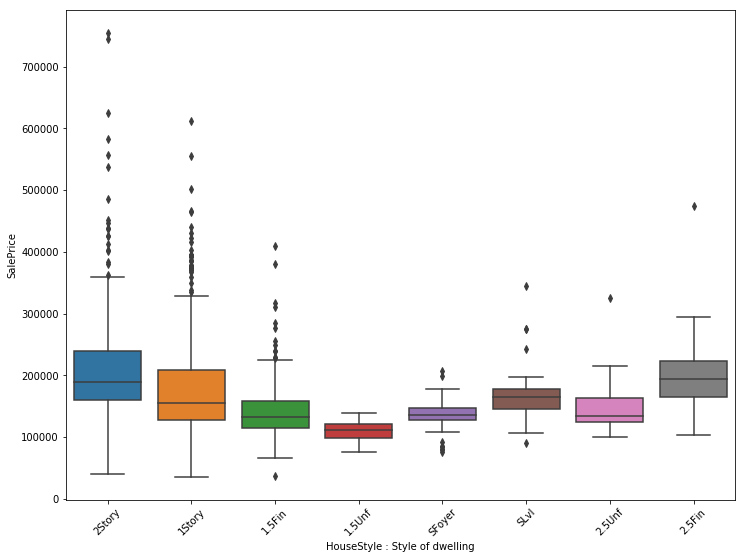

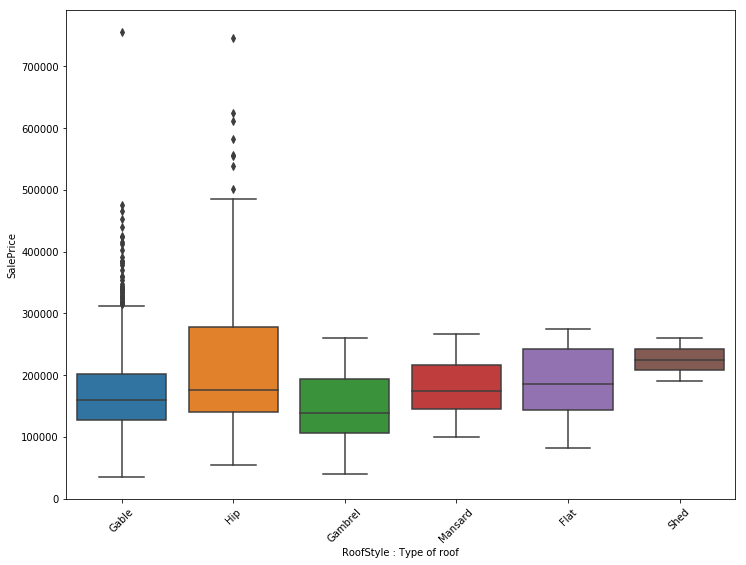

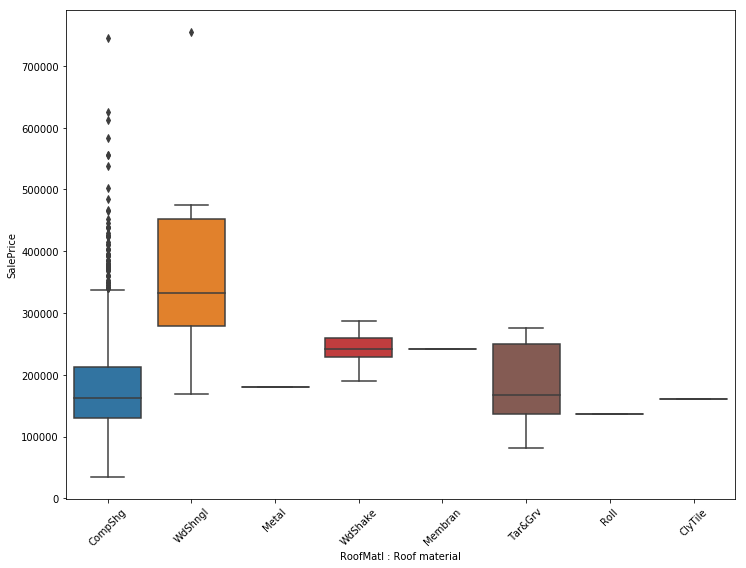

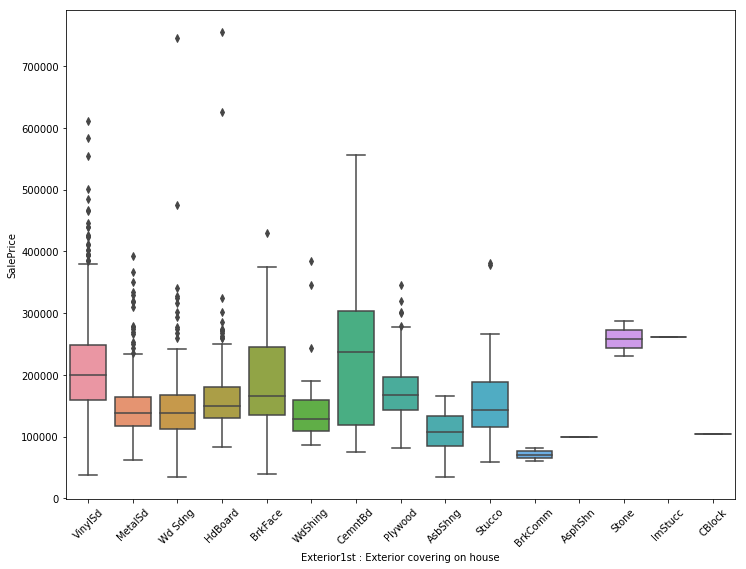

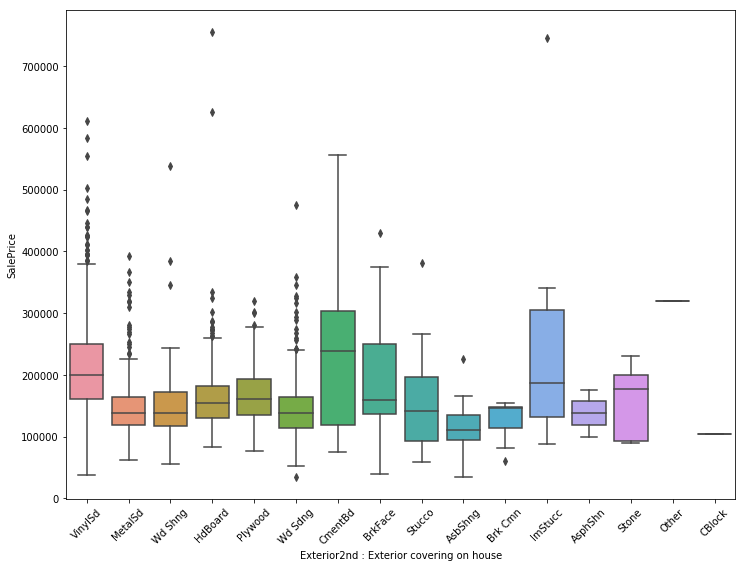

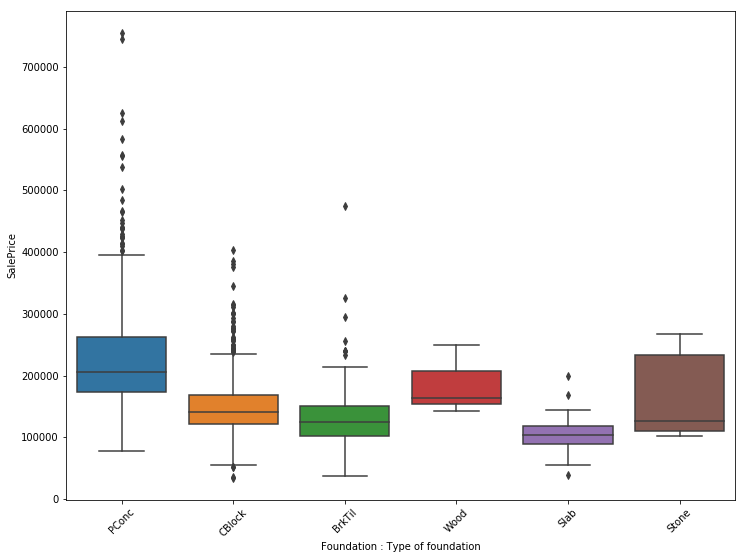

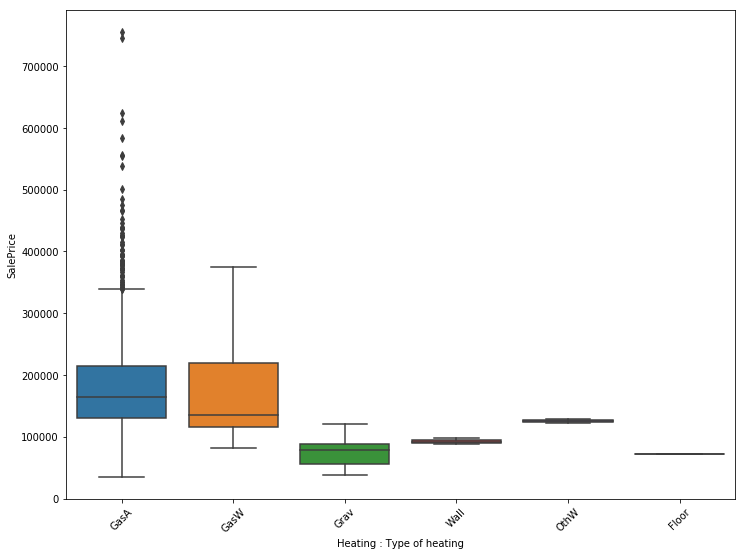

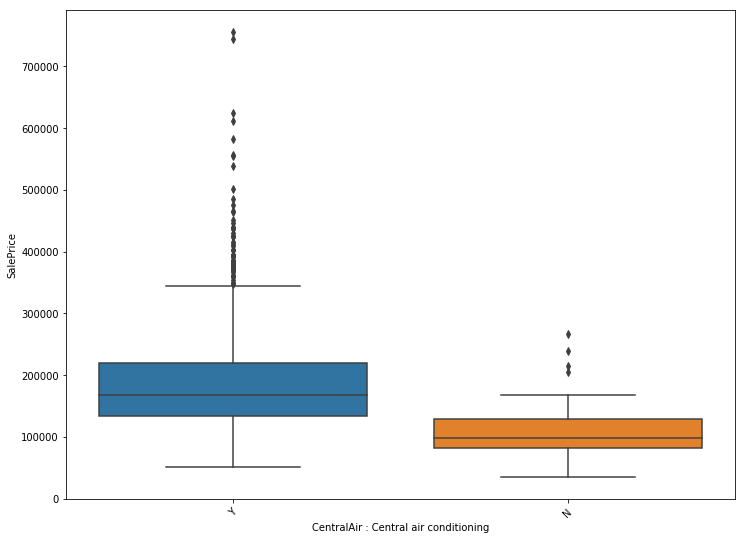

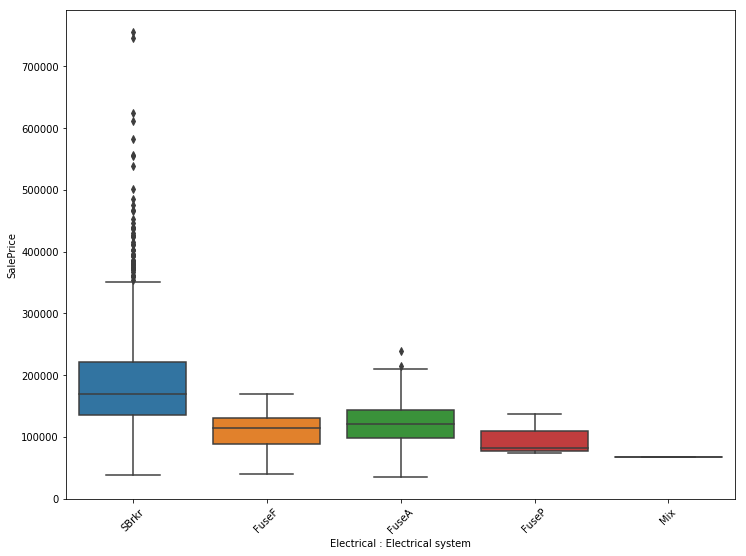

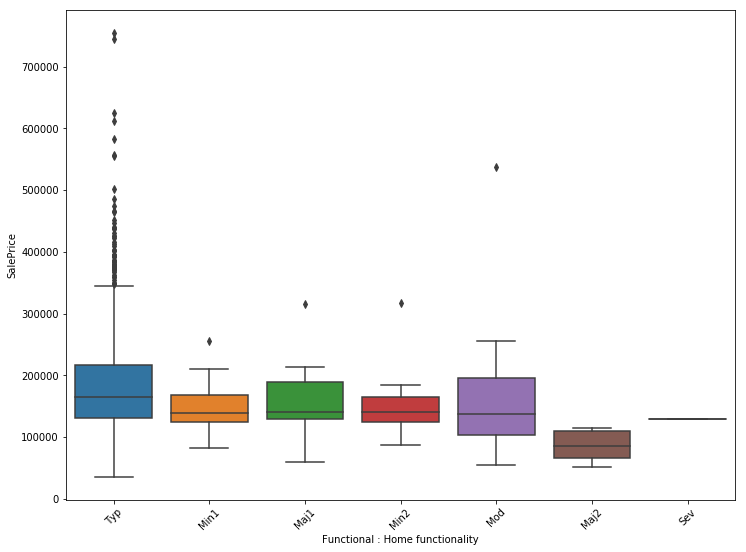

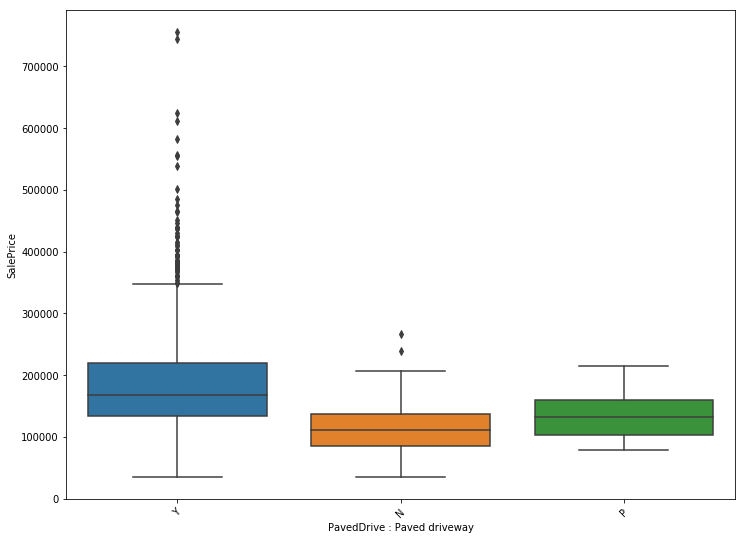

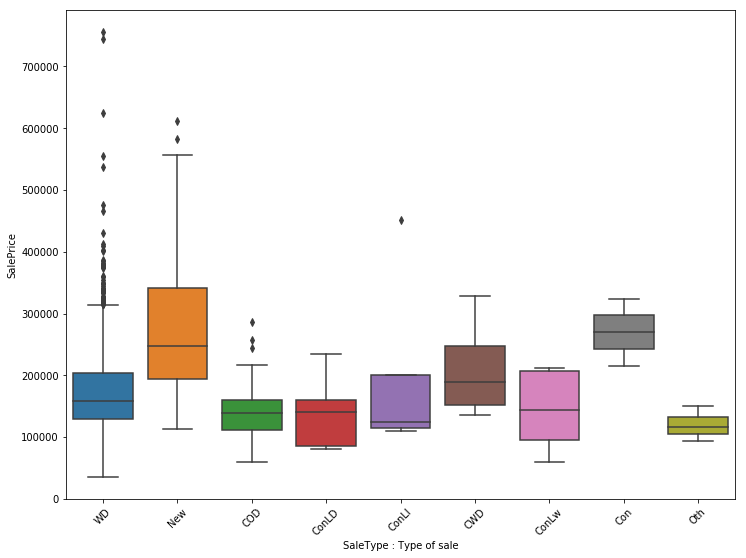

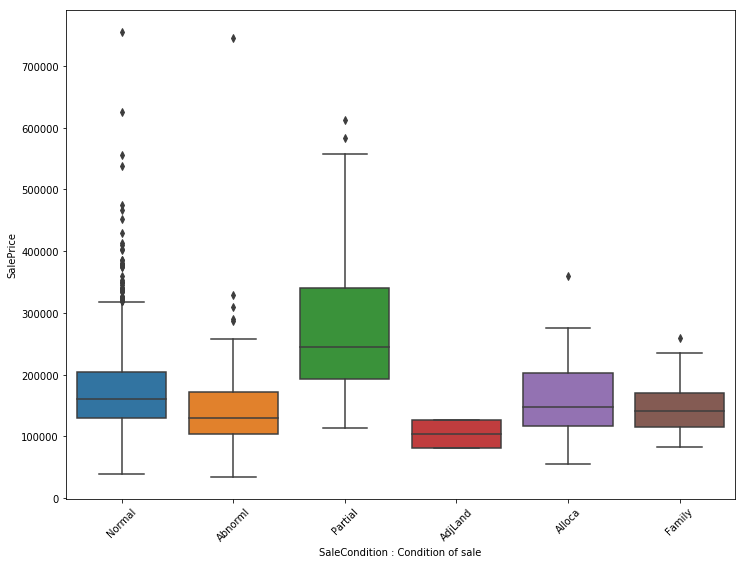

In [21]:
for field in fields:

    _ = sns.boxplot(
        x    = field[0], 
        y    = 'SalePrice', 
        data = df_train
    )
    
    _ = plt.xticks(rotation=45)
    
    _ = plt.xlabel(field[0]+' : '+field[1])
    _ = plt.ylabel('SalePrice')
    
    plt.show()

---
#### As can been, there are quite a few variables that we should do further research into to see how it can be used to predict the SalesPrice.

#### However, at the moment (due to time constraints), we select the following few fields to further research:
1. `MSZoning`: Zoning classification    
2. `Neighborhood`: Locations within Ames city
3. `CentralAir`: Central air conditioning

These fields have a clear impact on the `SalesPrice`